In [419]:
using Plots
using JLD2
using LaTeXStrings

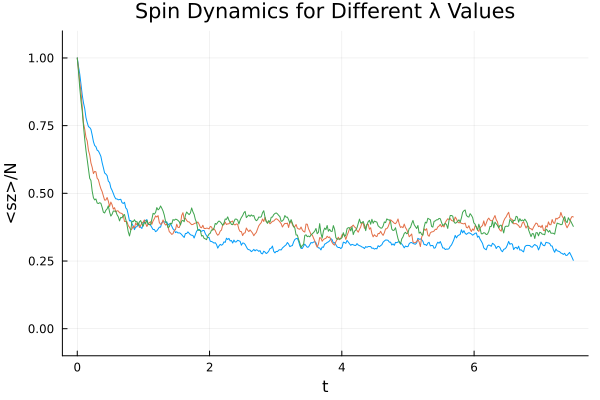

In [645]:
λ_values = [1,2,3,4,5,6,7,8,9,10,12,14,16,18,20,22,24,30,32,35,37,40]
Γ = 1
λ_crit = 8
beta = 0.276
delta = 0.159
plt = plot(
    xlabel = "t", 
    ylabel = "<sz>/N",
    legend = false, 
    title = "Spin Dynamics for Different λ Values",
    ylim=[-0.1, 1.1]
)

for λ in λ_values
    try
        file_name = "sz_mean_steady,λ=$(λ).jld2"
        
        @load file_name t sz_mean_mean
        
        plot!(plt, t, vec(sz_mean_mean), label = "λ = $λ")
    catch e
        println("Could not load or plot for λ = $λ: ", e)
    end
end

display(plt)

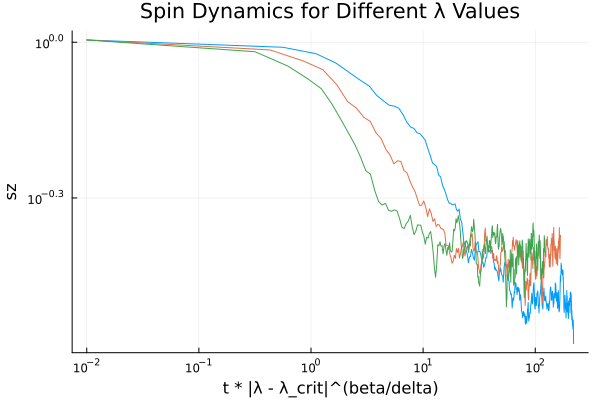

In [646]:
plt = plot(
    xlabel = "t * |λ - λ_crit|^(beta/delta)", 
    ylabel = "sz",
    xscale=:log10,
    yscale=:log10,
    legend = false, 
    title = "Spin Dynamics for Different λ Values"
)

for λ in λ_values
    try
        file_name = "sz_mean_steady,λ=$(λ).jld2"
        
        @load file_name t sz_mean_mean
        
        plot!(plt, t * abs(λ - λ_crit)^(beta/delta) .+ 0.01, vec(sz_mean_mean) .+ 0.01, label = "λ = $λ")
    catch e
        println("Could not load or plot for λ = $λ: ", e)
    end
end

display(plt)

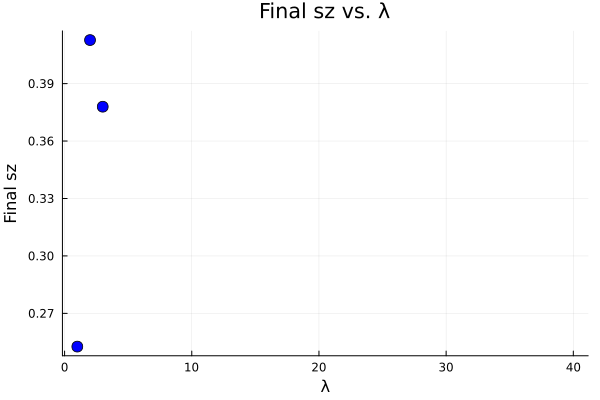

In [647]:
final_sz_values = Float64[]

for λ in λ_values
    try
        file_name = "sz_mean_steady,λ=$(λ).jld2"
        
        @load file_name t sz_mean_mean
        
        push!(final_sz_values, last(sz_mean_mean))
    catch e
        println("Could not load or process for λ = $λ: ", e)
        push!(final_sz_values, NaN)  
    end
end

scatter(
    # log.(abs.(λ_values .- λ_crit)), log.(abs.(final_sz_values)),
    λ_values, final_sz_values,
    xlabel = "λ",
    ylabel = "Final sz",
    title = "Final sz vs. λ",
    legend = false,
    # xscale=:log10,
    # yscale=:log10,
    marker = :circle,
    markersize = 6,
    color = :blue
)

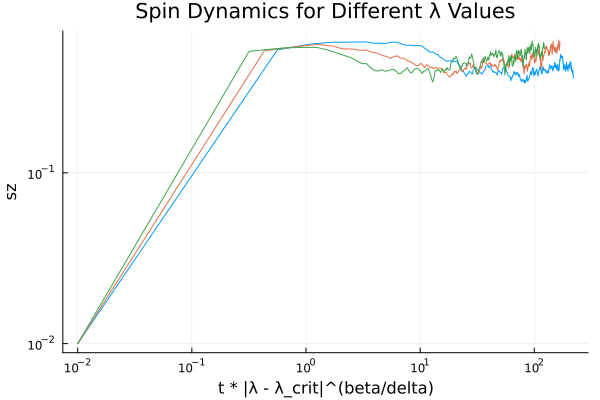

In [648]:
plt = plot(
    xlabel = "t * |λ - λ_crit|^(beta/delta)", 
    ylabel = "sz",
    xscale=:log10,
    yscale=:log10,
    legend = false, 
    title = "Spin Dynamics for Different λ Values"
)

for λ in λ_values
    try

        file_name = "sz_mean_steady,λ=$(λ).jld2"
        
        @load file_name t sz_mean_mean
        

        plot!(plt, t * abs(λ - λ_crit)^(beta/delta) .+ 1e-2, vec(sz_mean_mean) .* t.^delta .+ 0.01, label = "λ = $λ")
    catch e
        println("Could not load or plot for λ = $λ: ", e)
    end
end

display(plt)